In [1]:
import pandas as pd
chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Dataset info

In [10]:
chipo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4619 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


# Drop duplicate rows

In [35]:
chipo.drop_duplicates()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


# Change data type of 'item_price' by two ways: use astype or lambda function

In [16]:
chipo['item_price']=chipo['item_price'].str.replace('$','').astype(float)

C:\Users\Duyen\AppData\Local\Temp\ipykernel_10668\2633442085.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price']=chipo['item_price'].str.replace('$','').astype(float)


In [2]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]) if isinstance(x, str) else x)

In [3]:
chipo['item_price'].dtype

dtype('float64')

In [13]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,NaN
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",NaN


In [16]:
chipo.shape

(4622, 5)

In [7]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# The most ordered item

In [21]:
c = chipo.groupby('item_name').sum()
c.head()

C:\Users\Duyen\AppData\Local\Temp\ipykernel_14264\4173842986.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = chipo.groupby('item_name').sum()


,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40


In [24]:
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,item_price
item_name,,,
Chicken Bowl,713926,761,7342.73


Chicken Bowl is the most ordered item, with quantity of 761

# The most ordered item in choice description

In [28]:
c = chipo.groupby('choice_description').sum()
c.head()

C:\Users\Duyen\AppData\Local\Temp\ipykernel_14264\1827365667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = chipo.groupby('choice_description').sum()


,order_id,quantity,item_price
choice_description,,,
"[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",214,1,7.4
"[Adobo-Marinated and Grilled Chicken, [Sour Cream, Cheese, Cilantro-Lime Rice]]",279,1,7.4
[Adobo-Marinated and Grilled Chicken],217,1,7.4
"[Adobo-Marinated and Grilled Steak, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",279,1,7.4
[Adobo-Marinated and Grilled Steak],217,1,7.4


In [27]:
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,item_price
choice_description,,,
[Diet Coke],123455,159,326.71


Diet coke is the most ordered item in the choice-description, with quantity of 159

In [ ]:

filt=chipo['item_price']>10
chipo3=chipo[filt].drop_duplicates(['item_name', 'quantity', 'choice_description'])
chipo3['item_name'].nunique()

# Number of ordered items in total

In [29]:
total_items_orders = chipo['quantity'].sum()
total_items_orders

4972

# revenue for the period in the dataset

In [8]:
import numpy as np
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


# Number of orders were made in the period

In [10]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [12]:
orders = chipo.order_id.value_counts().count()
orders

1834

# average revenue amount per order

In [25]:
order_totals = chipo.groupby('order_id')['item_price'].sum()

# Calculate the average revenue per order
average_revenue_per_order = np.round(order_totals.mean(),2)
average_revenue_per_order

18.81

# Number of different items are sold?

In [26]:
#Solution 1
chipo['item_name'].nunique()

50

In [28]:
#solution 2
chipo['item_name'].value_counts().count()

50

# Number of products cost more than $10.00

In [32]:
filt=chipo['item_price']>10
chipo[filt]['item_name'].count()

1130

# The price of each item?

In [7]:
# Calculate unit price
chipo['unit_price'] = chipo['item_price'] / chipo['quantity']
chipo

,order_id,quantity,item_name,choice_description,item_price,unit_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [16]:
# Remove duplicates
unique_items = chipo.drop_duplicates(subset=['item_name', 'unit_price','choice_description'])
unique_items.sort_values(['item_name'])

,order_id,quantity,item_name,choice_description,item_price,unit_price
357,154,1,6 Pack Soft Drink,[Coke],6.49,6.49
3141,1253,1,6 Pack Soft Drink,[Lemonade],6.49,6.49
721,298,1,6 Pack Soft Drink,[Nestea],6.49,6.49
298,129,1,6 Pack Soft Drink,[Sprite],6.49,6.49
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
...,...,...,...,...,...,...
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75,8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49,8.49
1395,567,1,Veggie Soft Tacos,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...",8.49,8.49
3889,1559,2,Veggie Soft Tacos,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",16.98,8.49


In [19]:
#the average price for items (ignoring variations)
average_prices = unique_items.groupby('item_name')['unit_price'].mean().reset_index()
average_prices

,item_name,unit_price
0,6 Pack Soft Drink,6.490000
1,Barbacoa Bowl,10.227959
2,Barbacoa Burrito,9.979577
3,Barbacoa Crispy Tacos,10.087273
4,Barbacoa Salad Bowl,10.778889
5,Barbacoa Soft Tacos,10.380000
6,Bottled Water,1.295000
7,Bowl,7.400000
8,Burrito,7.400000
9,Canned Soda,1.090000


# the quantity of the most expensive item ordered

In [20]:
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price,unit_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,2.95


# How many times was a Veggie Salad Bowl ordered?

In [25]:
filt=chipo['item_name']=='Veggie Salad Bowl'
len(chipo[filt])

18

# How many times did someone order more than one Canned Soda?

In [26]:
filt=(chipo['item_name']=='Canned Soda')&(chipo['quantity']>1)
chipo[filt].count()

order_id              20
quantity              20
item_name             20
choice_description    20
item_price            20
unit_price            20
dtype: int64

# Visualizing Chipotle's Data

In [3]:
import matplotlib.pyplot as plt

# Create a histogram of the top 5 items bought

In [57]:
chipo3=chipo.groupby(['item_name']).sum().sort_values(by=['quantity'], ascending=False).head(5)
chipo3

C:\Users\Duyen\AppData\Local\Temp\ipykernel_14956\3482910892.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo3=chipo.groupby(['item_name']).sum().sort_values(by=['quantity'], ascending=False).head(5)


,order_id,quantity,item_price,unit_price
item_name,,,,
Chicken Bowl,713926,761,7342.73,7011.51
Chicken Burrito,497303,591,5575.82,5240.20
Chips and Guacamole,449959,506,2201.04,2081.55
Steak Burrito,328437,386,3851.43,3677.58
Canned Soft Drink,304753,351,438.75,376.25


In [ ]:
chipo3.reset_index(inplace=True)

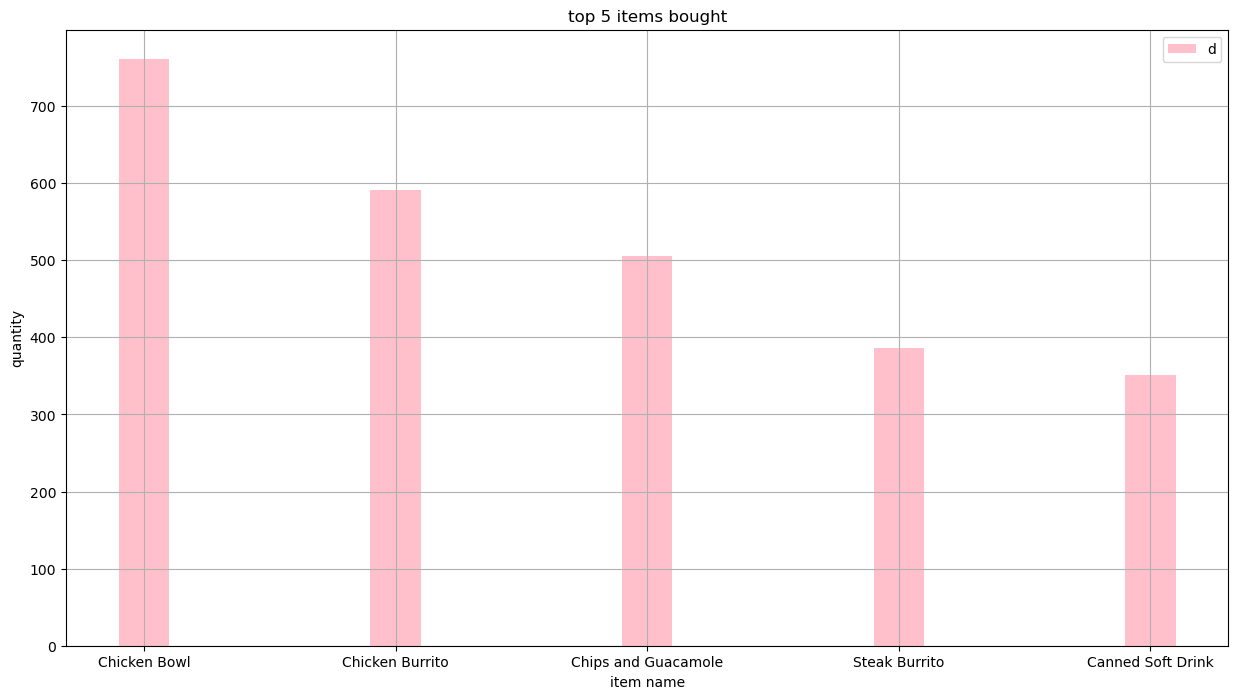

In [64]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)


ax.bar(chipo3['item_name'], chipo3['quantity'], color='pink',label='d',width=0.2)
ax.set_xlabel('item name')
ax.set_ylabel('quantity')
ax.title.set_text('top 5 items bought')
plt.legend()
ax.grid(True)




# Sales Distribution by Item

In [10]:

# Aggregate the quantity by item_name
total_quantity = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
total_quantity

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


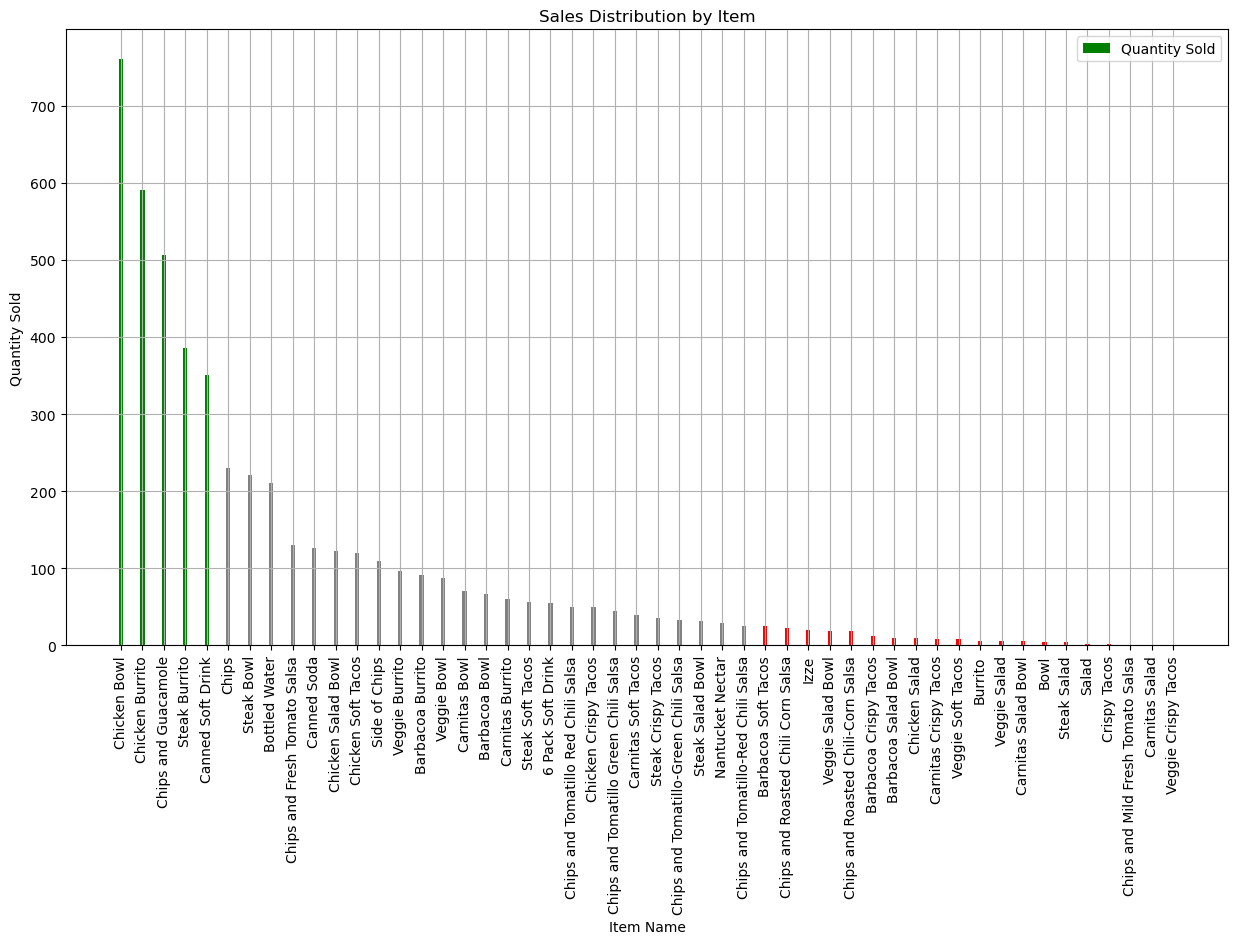

In [14]:
top_5_items = total_quantity.head(5).index
bottom_20_items = total_quantity.tail(20).index

# Create the plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# Plotting with color differentiation
for item, quantity in total_quantity.items():
    if item in top_5_items:
        color = 'green'
    elif item in bottom_20_items:
        color = 'red'
    else:
        color = 'gray'
    ax.bar(item, quantity, color=color, width=0.2)


# Setting labels and title
ax.set_xlabel('Item Name')
ax.set_ylabel('Quantity Sold')
ax.set_title('Sales Distribution by Item')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adding grid and legend
ax.grid(True)
plt.legend(['Quantity Sold'])

# Show the plot
plt.show()


# Revenue per Item: 
Since you have item prices, you can calculate the total revenue generated by each item and visualize this using a bar chart. This helps in understanding which items are contributing most to the revenue.

In [36]:
revenue_per_item = chipo.groupby('item_name').sum().sort_values(by=['item_price'],ascending=False)

revenue_per_item.head()

C:\Users\Duyen\AppData\Local\Temp\ipykernel_10668\218574024.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue_per_item = chipo.groupby('item_name').sum().sort_values(by=['item_price'],ascending=False)


,order_id,quantity,item_price
item_name,,,
Chicken Bowl,713926,761,7342.73
Chicken Burrito,497303,591,5575.82
Steak Burrito,328437,386,3851.43
Steak Bowl,193752,221,2260.19
Chips and Guacamole,449959,506,2201.04


In [26]:
revenue_per_item.loc['total revenue']=revenue_per_item.sum()
revenue_per_item['%revenue']=round(revenue_per_item['item_price']/revenue_per_item.loc['total revenue','item_price']*100,2)
revenue_per_item.head()

,order_id,quantity,item_price,%revenue
item_name,,,,
Crispy Tacos,434.0,2.0,14.80,0.04
Carnitas Salad,1500.0,1.0,8.99,0.03
Veggie Crispy Tacos,668.0,1.0,8.49,0.02
Chips and Mild Fresh Tomato Salsa,279.0,1.0,3.00,0.01
total revenue,4285772.0,4972.0,34500.16,100.00


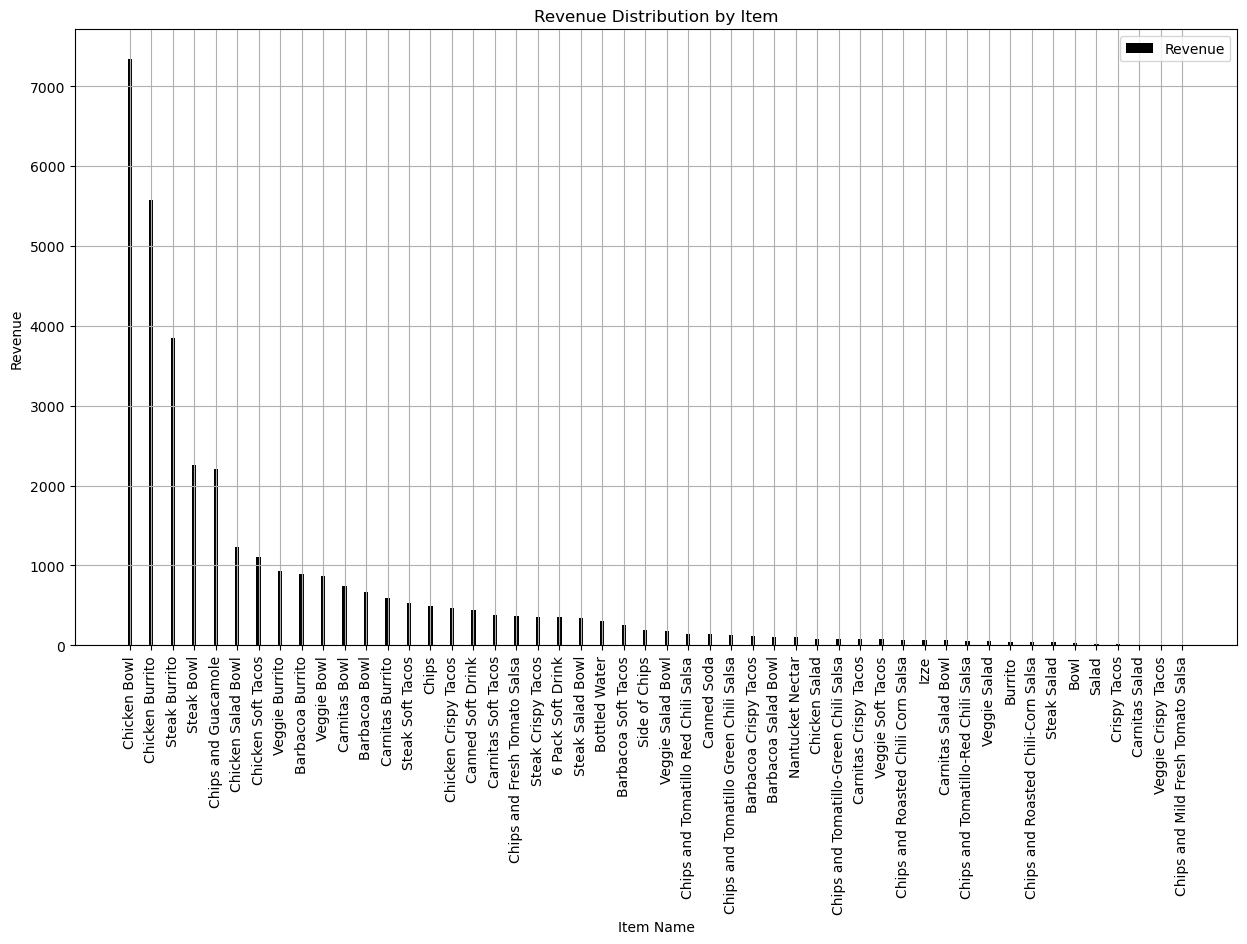

In [35]:
# Create the plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

ax.bar(revenue_per_item.index, revenue_per_item['item_price'], color='black',label='d',width=0.2)
# Setting labels and title
ax.set_xlabel('Item Name')
ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution by Item')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adding grid and legend
ax.grid(True)
plt.legend(['Revenue'])

# Show the plot
plt.show()

# Order Size Analysis: 
Analyze the distribution of order sizes (in terms of the number of items per order or total price per order). A histogram or box plot can be useful here.

In [38]:
order_item_counts = chipo.groupby('order_id')['quantity'].sum()
order_item_counts

order_id
1       4
2       2
3       2
4       2
5       2
       ..
1830    2
1831    3
1832    2
1833    2
1834    3
Name: quantity, Length: 1834, dtype: int64

In [40]:

# Total Price per Order
order_total_price = chipo.groupby('order_id')['item_price'].sum()
order_total_price

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

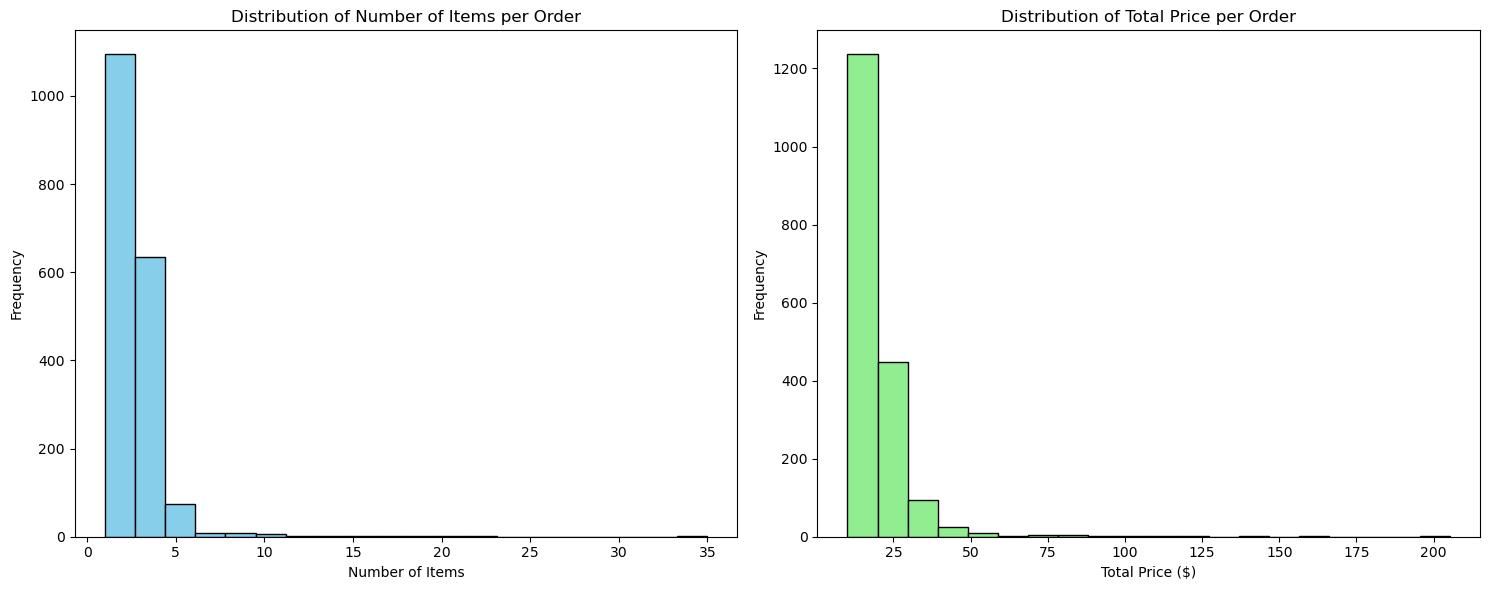

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Number of Items per Order
ax[0].hist(order_item_counts, bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Number of Items per Order')
ax[0].set_xlabel('Number of Items')
ax[0].set_ylabel('Frequency')

# Histogram for Total Price per Order
ax[1].hist(order_total_price, bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title('Distribution of Total Price per Order')
ax[1].set_xlabel('Total Price ($)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

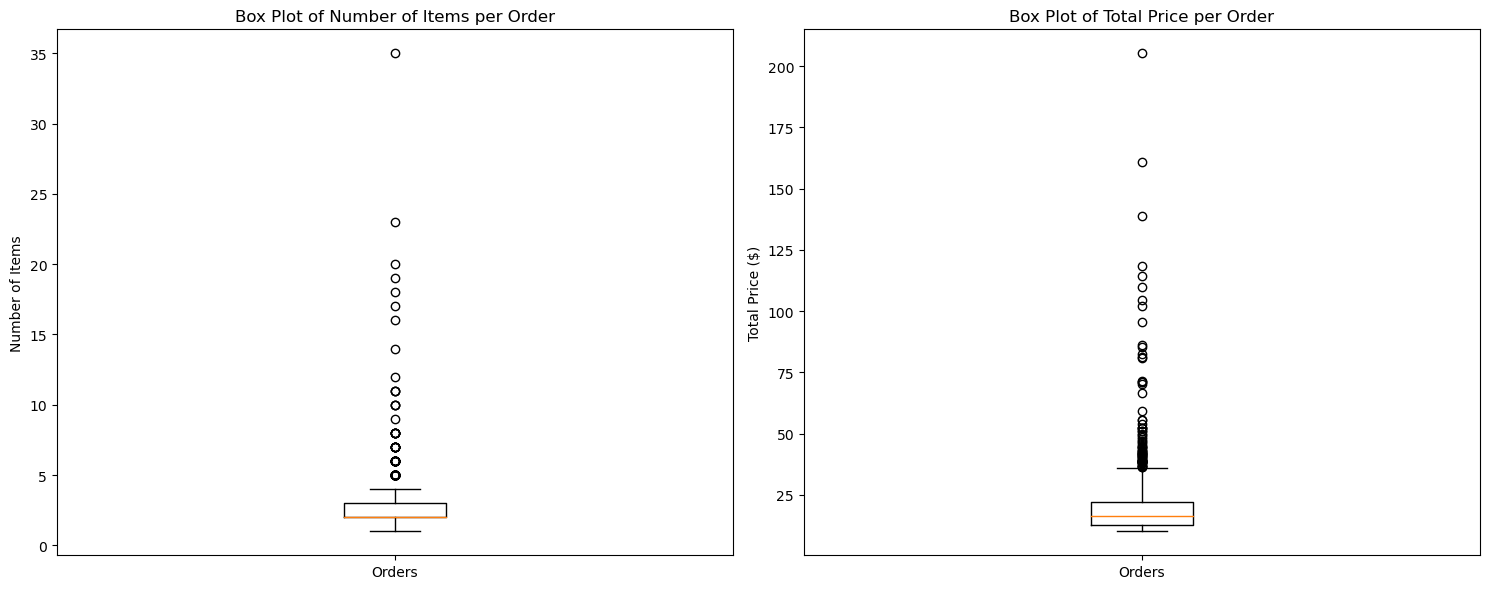

In [42]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Number of Items per Order
ax[0].boxplot(order_item_counts)
ax[0].set_title('Box Plot of Number of Items per Order')
ax[0].set_ylabel('Number of Items')
ax[0].set_xticklabels(['Orders'])

# Box plot for Total Price per Order
ax[1].boxplot(order_total_price)
ax[1].set_title('Box Plot of Total Price per Order')
ax[1].set_ylabel('Total Price ($)')
ax[1].set_xticklabels(['Orders'])

plt.tight_layout()
plt.show()

# Popular Combinations: 
If certain items are frequently ordered together, this could be valuable for marketing or menu design. You can use association rule mining or simply count combinations and visualize them in a heatmap or network graph.

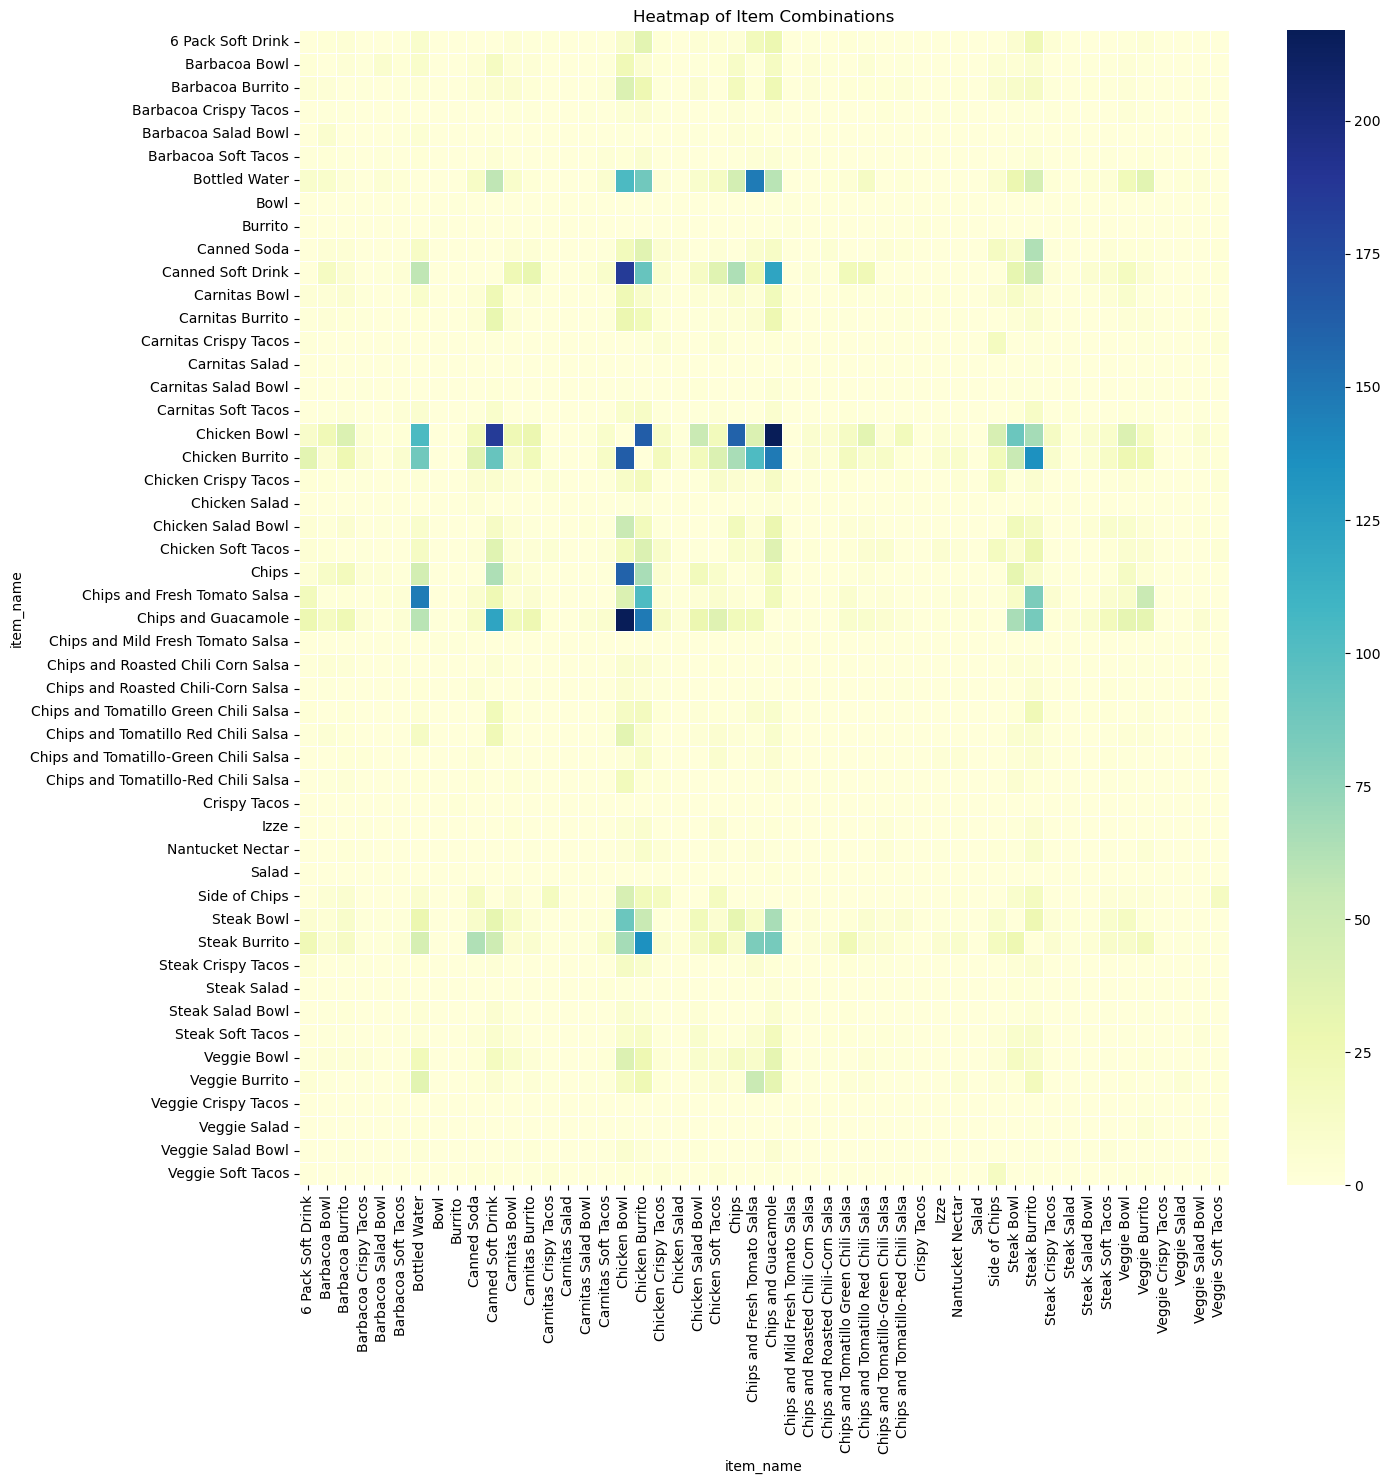

In [45]:
import seaborn as sns
import numpy as np
order_item_matrix = pd.pivot_table(chipo, values='quantity', index='order_id', columns='item_name', aggfunc=np.sum, fill_value=0)

# Generate item pairs and count their co-occurrences
item_combinations = order_item_matrix.T.dot(order_item_matrix)

# Set the diagonal to zero (to ignore self-pairing)
np.fill_diagonal(item_combinations.values, 0)

# Plotting
plt.figure(figsize=(15, 15))
sns.heatmap(item_combinations, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Item Combinations')
plt.show()

# Choice Descriptions Analysis: 
Analyze the most common ingredients or choices in customizable items like burritos or bowls. This could be visualized using a word cloud or bar chart.



In [ ]:
from collections import Counter

In [47]:
# Filter for items like burritos or bowls
customizable_items = chipo[chipo['item_name'].str.contains('Burrito|Bowl')]
customizable_items

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [49]:
# Extract ingredients from choice_description
ingredients = customizable_items['choice_description'].str.replace('[\[\]]', '', regex=True).str.split(', ')
ingredients

4       [Tomatillo-Red Chili Salsa (Hot), Black Beans,...
5       [Fresh Tomato Salsa (Mild), Rice, Cheese, Sour...
7       [Tomatillo Red Chili Salsa, Fajita Vegetables,...
9       [Fresh Tomato Salsa, Rice, Black Beans, Pinto ...
13      [Fresh Tomato Salsa, Fajita Vegetables, Rice, ...
                              ...                        
4617    [Fresh Tomato Salsa, Rice, Black Beans, Sour C...
4618    [Fresh Tomato Salsa, Rice, Sour Cream, Cheese,...
4619    [Fresh Tomato Salsa, Fajita Vegetables, Pinto ...
4620     [Fresh Tomato Salsa, Fajita Vegetables, Lettuce]
4621    [Fresh Tomato Salsa, Fajita Vegetables, Pinto ...
Name: choice_description, Length: 2503, dtype: object

In [50]:
# Flatten the list of ingredients and count occurrences
ingredient_counts = Counter(ingredient for sublist in ingredients for ingredient in sublist if isinstance(sublist, list))
ingredient_counts

Counter({'Tomatillo-Red Chili Salsa (Hot)': 223,
         'Black Beans': 1257,
         'Rice': 2216,
         'Cheese': 1978,
         'Sour Cream': 1504,
         'Fresh Tomato Salsa (Mild)': 299,
         'Guacamole': 955,
         'Lettuce': 1523,
         'Tomatillo Red Chili Salsa': 271,
         'Fajita Vegetables': 659,
         'Pinto Beans': 540,
         'Fresh Tomato Salsa': 941,
         'Tomatillo-Green Chili Salsa (Medium)': 110,
         'Roasted Chili Corn Salsa (Medium)': 243,
         'Fajita Veggies': 273,
         'Roasted Chili Corn Salsa': 382,
         'Tomatillo Green Chili Salsa': 210,
         'Fresh Tomato (Mild)': 30,
         'Braised Carnitas': 1,
         'Cilantro-Lime Rice': 7,
         'Adobo-Marinated and Grilled Chicken': 2,
         'Salsa': 6,
         'Braised Barbacoa': 2,
         'Vegetarian Black Beans': 1,
         'Adobo-Marinated and Grilled Steak': 3,
         'Roasted Chili Corn (Medium)': 2,
         'White Rice': 4,
         'Tomatillo

In [52]:
# Convert to DataFrame for easy plotting
ingredient_df = pd.DataFrame(ingredient_counts.most_common(), columns=['Ingredient', 'Count'])
ingredient_df.head()

,Ingredient,Count
0,Rice,2216
1,Cheese,1978
2,Lettuce,1523
3,Sour Cream,1504
4,Black Beans,1257


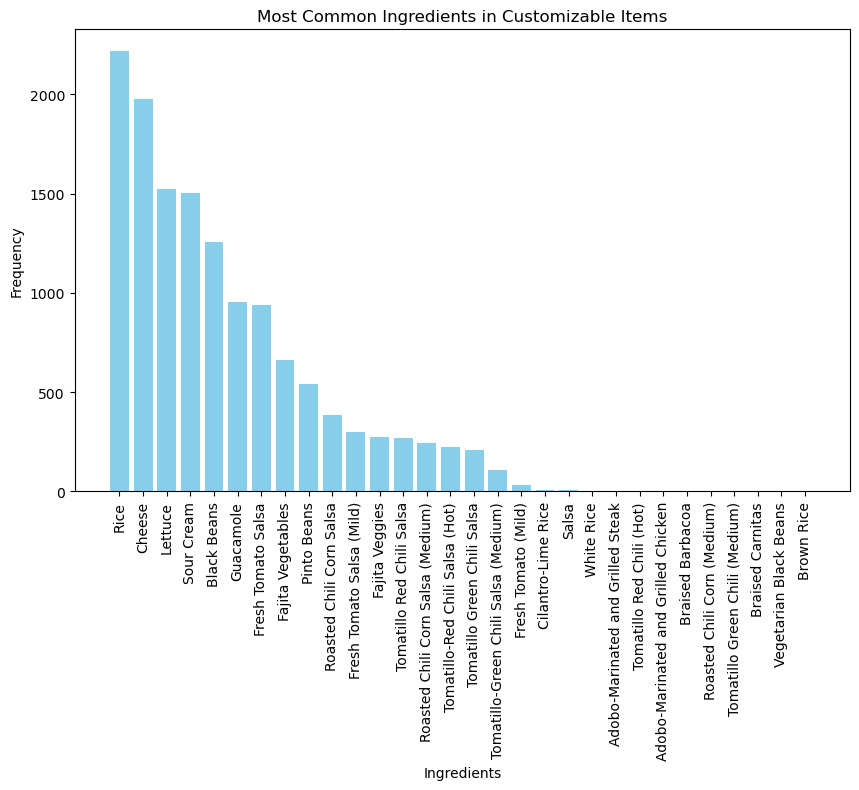

In [46]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ingredient_df['Ingredient'], ingredient_df['Count'], color='skyblue')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Most Common Ingredients in Customizable Items')
plt.xticks(rotation=90)
plt.show()


# a scatterplot with the number of items orderered per order price

In [71]:
chipo4=chipo.groupby('order_id').sum()
chipo4

C:\Users\Duyen\AppData\Local\Temp\ipykernel_14956\3613397525.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo4=chipo.groupby('order_id').sum()


,quantity,item_price,unit_price
order_id,,,
1,4,11.56,11.56
2,2,16.98,8.49
3,2,12.67,12.67
4,2,21.00,21.00
5,2,13.70,13.70
...,...,...,...
1830,2,23.00,23.00
1831,3,12.90,12.90
1832,2,13.20,13.20


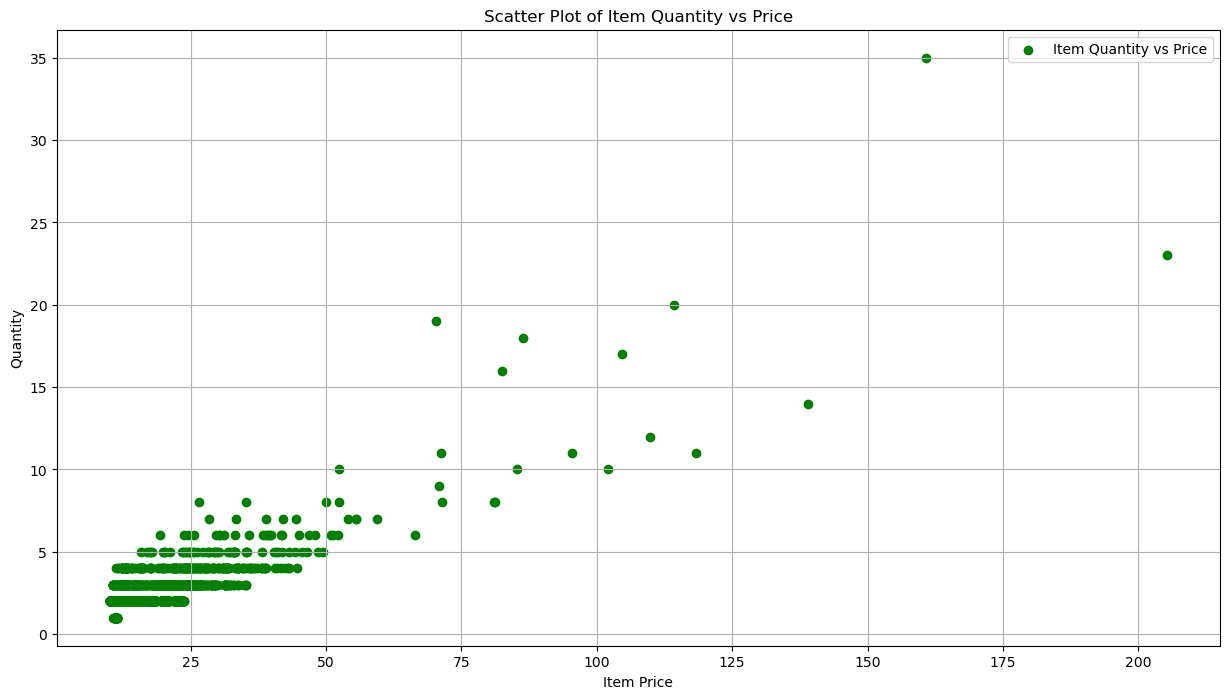

In [73]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)

ax.scatter(chipo4['item_price'], chipo4['quantity'], color='green', label='Item Quantity vs Price')

ax.set_xlabel('Item Price')
ax.set_ylabel('Quantity')
ax.title.set_text('Scatter Plot of Item Quantity vs Price')
plt.legend()
ax.grid(True)

plt.show()

In [78]:
chipo5=chipo.groupby('item_name').mean()
chipo5.head()

C:\Users\Duyen\AppData\Local\Temp\ipykernel_14956\2868110754.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo5=chipo.groupby('item_name').mean()


,order_id,quantity,item_price,unit_price
item_name,,,,
6 Pack Soft Drink,968.925926,1.018519,6.610185,6.490000
Barbacoa Bowl,817.757576,1.000000,10.187273,10.187273
Barbacoa Burrito,821.076923,1.000000,9.832418,9.832418
Barbacoa Crispy Tacos,510.272727,1.090909,10.928182,10.087273
Barbacoa Salad Bowl,970.800000,1.000000,10.640000,10.640000


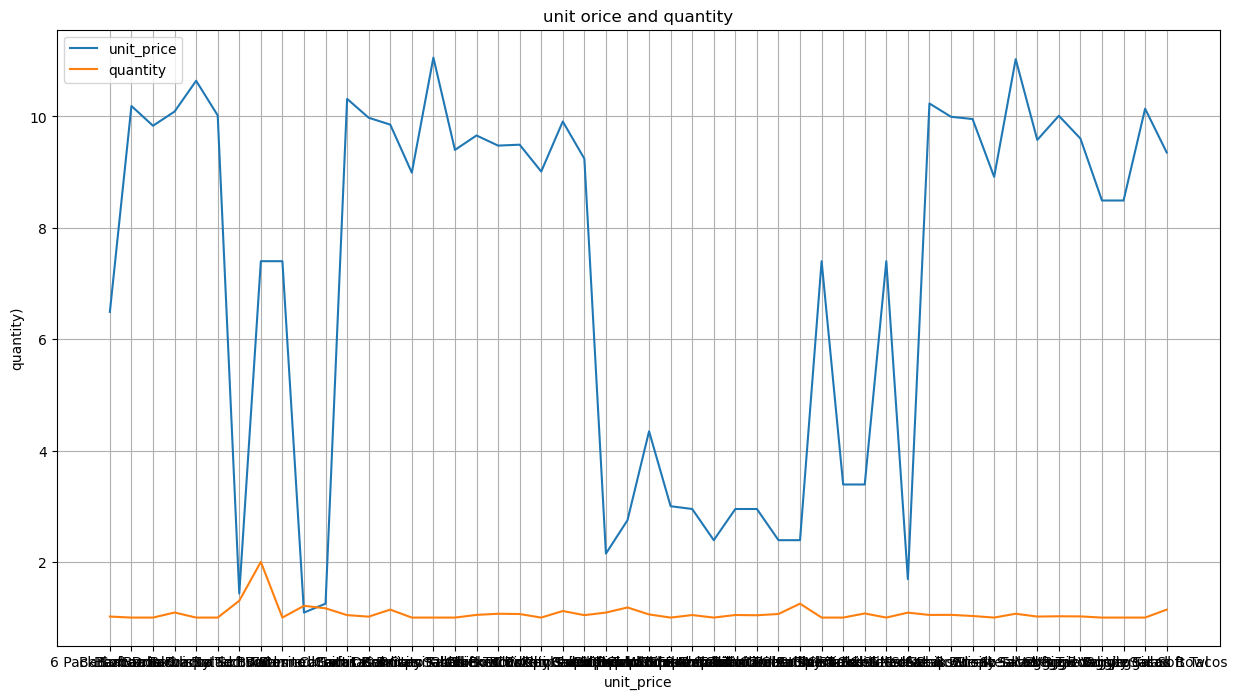

In [82]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)

ax.plot(chipo5['unit_price'], label='unit_price')
ax.plot(chipo5['quantity'], label='quantity')
ax.set_xlabel('unit_price')
ax.set_ylabel('quantity)')
ax.title.set_text('unit orice and quantity')
ax.legend(loc='upper left')
ax.grid(True)


plt.show()

In [1]:
import requests

# URL of the TSV file
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in write mode with binary format
    with open('chipotle.tsv', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully")
else:
    print("Failed to retrieve the file")


File downloaded successfully
